In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
data = pd.read_csv("restaurant-1-orders.csv")
data.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [3]:
#slect only needed columns
data_port = data[["Order Date", "Product Price", "Quantity", "Total products"]]

# drop NaN-Cases
data_port = data_port.dropna()
data_port

,Order Date,Product Price,Quantity,Total products
0,03/08/2019 20:25,0.80,2,6
1,03/08/2019 20:25,12.95,1,6
2,03/08/2019 20:25,2.95,1,6
3,03/08/2019 20:25,3.95,1,6
4,03/08/2019 20:25,8.95,1,6
...,...,...,...,...
74813,18/05/2016 18:53,17.95,2,7
74814,14/05/2016 19:28,17.95,2,6
74815,10/05/2016 13:18,17.95,2,9
74816,07/04/2016 19:04,17.95,1,6


In [4]:
#change to datetime
data_port["Order Date"] = pd.to_datetime(data_port["Order Date"])
#data_port = data_port.set_index('Order Date')

data_port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      74818 non-null  datetime64[ns]
 1   Product Price   74818 non-null  float64       
 2   Quantity        74818 non-null  int64         
 3   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.9 MB


In [5]:
data_ts = data_port[["Order Date", "Total products"]]
data_ts.head()

,Order Date,Total products
0,2019-03-08 20:25:00,6
1,2019-03-08 20:25:00,6
2,2019-03-08 20:25:00,6
3,2019-03-08 20:25:00,6
4,2019-03-08 20:25:00,6


In [6]:
#ts = data_port.groupby("Order Date")["Total products"]
#ts.head()

In [7]:
data_ts.rename(columns= {'Order Date':'ds', 'Total products':'y'}, inplace = True)

c:\Users\muste\anaconda3\envs\SeemsDancy\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
data_ts.head()

,ds,y
0,2019-03-08 20:25:00,6
1,2019-03-08 20:25:00,6
2,2019-03-08 20:25:00,6
3,2019-03-08 20:25:00,6
4,2019-03-08 20:25:00,6


In [9]:
m = Prophet()
m.fit(data_ts)

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
13441,2020-12-02 22:24:00
13442,2020-12-03 22:24:00
13443,2020-12-04 22:24:00
13444,2020-12-05 22:24:00
13445,2020-12-06 22:24:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
13441,2020-12-02 22:24:00,5.240795,-2.842150,13.479791
13442,2020-12-03 22:24:00,5.096716,-3.332476,13.595227
13443,2020-12-04 22:24:00,6.095699,-2.053134,14.538548
13444,2020-12-05 22:24:00,6.198232,-1.910764,14.530927
13445,2020-12-06 22:24:00,5.414730,-2.978051,13.538443


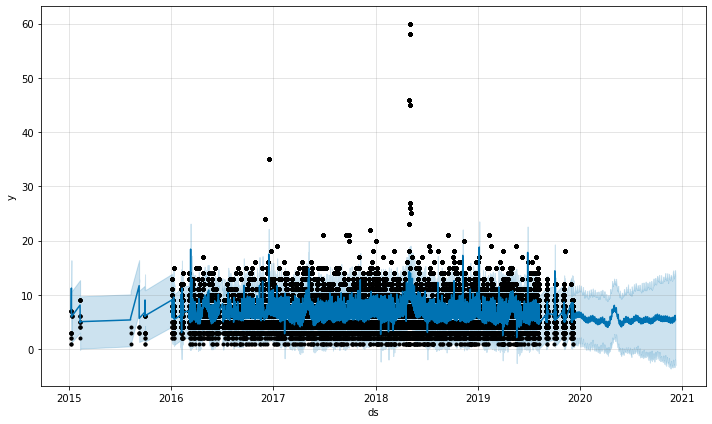

In [12]:
fig1 = m.plot(forecast)

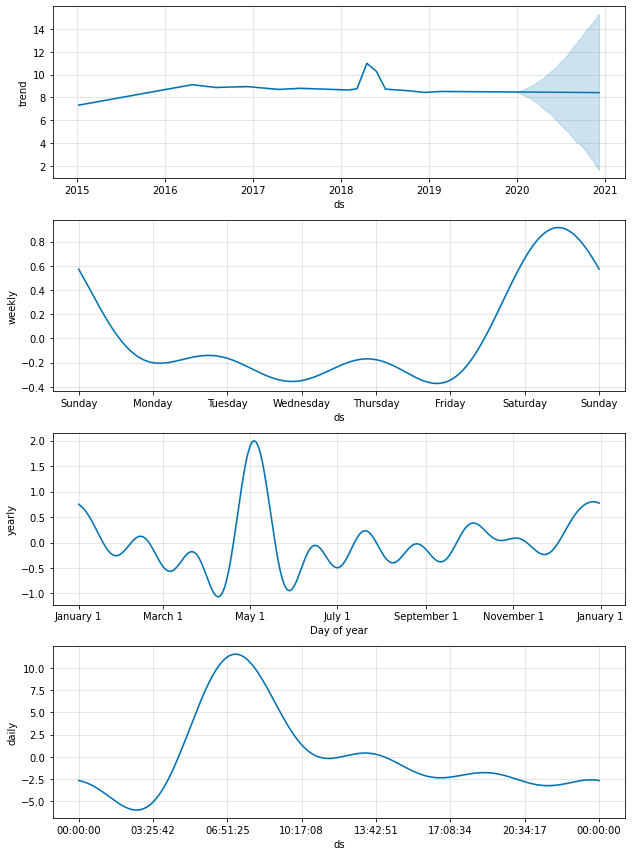

In [13]:
fig2 = m.plot_components(forecast)


## Predict one week

In [14]:
future_week = m.make_future_dataframe(periods=7)
future_week.tail(7)

,ds
13081,2019-12-08 22:24:00
13082,2019-12-09 22:24:00
13083,2019-12-10 22:24:00
13084,2019-12-11 22:24:00
13085,2019-12-12 22:24:00
13086,2019-12-13 22:24:00
13087,2019-12-14 22:24:00


In [15]:
forecast_week = m.predict(future_week)

In [16]:
forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
13081,2019-12-08 22:24:00,5.536651,0.815678,10.511514
13082,2019-12-09 22:24:00,5.623116,0.299544,10.512281
13083,2019-12-10 22:24:00,5.470320,0.734494,10.176395
13084,2019-12-11 22:24:00,5.700041,0.638113,10.566223
13085,2019-12-12 22:24:00,5.553552,0.742680,10.025371
13086,2019-12-13 22:24:00,6.546179,1.898296,11.706974
13087,2019-12-14 22:24:00,6.638751,1.785073,11.090585


In [17]:
#fig1 = m.plot(forecast_week)

In [18]:
tail = forecast_week['yhat'].tail(7)
vorhersage = forecast_week['yhat'].tolist()
vorhersage

[7.285471668722211,
 11.23605856752107,
 10.780675005836297,
 8.9495902619048,
 7.138916793467985,
 6.263694406862973,
 6.2507432522406745,
 5.956408005853745,
 8.113671352770389,
 7.213830771102398,
 6.589936552141842,
 4.8403974753568395,
 5.0455610164030205,
 5.365057464990859,
 5.485463857321316,
 5.661274554299272,
 11.685441272421581,
 7.474412037061662,
 7.47568212697875,
 8.017729610404201,
 7.003200809141401,
 5.65713230649998,
 6.795921109035788,
 6.501912029841094,
 6.022258639385267,
 9.04221300100723,
 6.642953834889182,
 6.465141084867352,
 6.14249992124892,
 9.041315310664618,
 9.127943029480766,
 7.464781528779705,
 7.456849093388819,
 7.1924154559024895,
 6.9110791257828055,
 6.885226293166525,
 6.580870799838653,
 6.099774224101283,
 6.026723923946767,
 7.211711900957207,
 5.770571839528265,
 6.78599294463895,
 6.803957174678442,
 6.866701947100859,
 7.112490266099664,
 6.046106596457532,
 8.083495504468619,
 8.068286570980153,
 6.811824001822291,
 9.584986699654422,


In [19]:
tail = forecast_week['yhat'].tail(7)
vorhersage = tail.tolist()
vorhersage

[5.536651398428474,
 5.623116193617774,
 5.470319584577764,
 5.700040519872582,
 5.553552219772976,
 6.546179383098091,
 6.638751458651194]

In [20]:
import pyodbc

connection_string = (
'DRIVER=MySQL ODBC 8.0 ANSI Driver;'
'SERVER=localhost;'
'DATABASE=restaurant_products;'
'UID=root;'
'PWD=;'
'charset=utf8mb4;'
)

conn=pyodbc.connect(connection_string)

#executes an command like insert / create
def execute(command):
    cursor=conn.cursor()
    cursor.execute(command)
    cursor.commit()

#inserts an product to table teebeutel
def predict(machineID):
    command='insert into teebeutel (restaurantID,datum,,sorte) values (current_timestamp(),"'+machineID+'","Earl Grey");'
    #print(command)
    execute(command)

#inserts a temperature-event to the table temperatur
def predict(date, restaurantID, quantity, min_quantity, max_quantity):
    command='insert into prediction (restaurantId,datum,quantity,max_quantity,min_quantity) values ("'+date+'","'+restaurantID+'",'+str(quantity)+','+str(min_quantity)+','+str(max_quantity)+');'
    #print(command)
    execute(command)

## Quellen

https://facebook.github.io/prophet/docs/quick_start.html



https://www.youtube.com/watch?v=KvLG1uTC-KU
